In [83]:
#Punto 2 Tarea 2 Solar Astrophýsics.
from astropy.io import fits 
import matplotlib.pyplot as plt 
import numpy as np 

In [84]:
datacube = fits.open("6300_synth.fits")
datacube.info()

Filename: 6300_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (131, 4, 288, 288)   float64   
  1                1 ImageHDU         6   (131,)   float64   


In [85]:

datacube[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  131                                                  
NAXIS2  =                    4                                                  
NAXIS3  =                  288                                                  
NAXIS4  =                  288                                                  
EXTEND  =                    T                                                  

In [86]:
stokes0 = datacube[0].data
ll = datacube[1].data

In [4]:
print(ll)

[6300.7  6300.72 6300.74 6300.76 6300.78 6300.8  6300.82 6300.84 6300.86
 6300.88 6300.9  6300.92 6300.94 6300.96 6300.98 6301.   6301.02 6301.04
 6301.06 6301.08 6301.1  6301.12 6301.14 6301.16 6301.18 6301.2  6301.22
 6301.24 6301.26 6301.28 6301.3  6301.32 6301.34 6301.36 6301.38 6301.4
 6301.42 6301.44 6301.46 6301.48 6301.5  6301.52 6301.54 6301.56 6301.58
 6301.6  6301.62 6301.64 6301.66 6301.68 6301.7  6301.72 6301.74 6301.76
 6301.78 6301.8  6301.82 6301.84 6301.86 6301.88 6301.9  6301.92 6301.94
 6301.96 6301.98 6302.   6302.02 6302.04 6302.06 6302.08 6302.1  6302.12
 6302.14 6302.16 6302.18 6302.2  6302.22 6302.24 6302.26 6302.28 6302.3
 6302.32 6302.34 6302.36 6302.38 6302.4  6302.42 6302.44 6302.46 6302.48
 6302.5  6302.52 6302.54 6302.56 6302.58 6302.6  6302.62 6302.64 6302.66
 6302.68 6302.7  6302.72 6302.74 6302.76 6302.78 6302.8  6302.82 6302.84
 6302.86 6302.88 6302.9  6302.92 6302.94 6302.96 6302.98 6303.   6303.02
 6303.04 6303.06 6303.08 6303.1  6303.12 6303.14 6303

In [12]:
print(ll.shape)

(131,)


In [87]:
#Se declaran como cero Q,U y V
stokes2=stokes0
stokes2[x_coordinate,y_coordinate,1]=np.zeros(131)
stokes2[x_coordinate,y_coordinate,2]=np.zeros(131)
stokes2[x_coordinate,y_coordinate,3]=np.zeros(131)


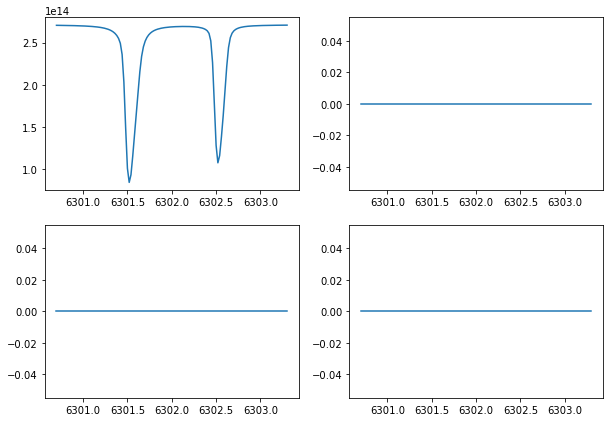

In [88]:
x_coordinate = 18
y_coordinate = 202
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,stokes2[x_coordinate,y_coordinate,0])
plt.subplot(222)
plt.plot(ll,stokes2[x_coordinate,y_coordinate,1])
plt.subplot(223)
plt.plot(ll,stokes2[x_coordinate,y_coordinate,2])
plt.subplot(224)
plt.plot(ll,stokes2[x_coordinate,y_coordinate,3])

In [ ]:
#Procedimiento del Hands On 11

In [89]:
def modulation_row(theta,delta):
    row = np.zeros(4)
    row[0] = 1.0
    row[1] = 1 * np.cos(2.0*theta)
    row[2] = 1 * np.cos(delta) * np.sin(2.0*theta)
    row[3] = 1 * np.sin(delta) * np.sin(2.0*theta)
    row = row.reshape(1,4)
    return row

In [90]:
print(modulation_row(0,0))

[[1. 1. 0. 0.]]


In [91]:
#Let's make our first modulation matrix! 
pi=np.pi
O4 = modulation_row(0,0)
O4 = np.concatenate([O4,modulation_row(pi/2,0)],axis=0)
O4 = np.concatenate([O4,modulation_row(pi/4,0)],axis=0)
O4 = np.concatenate([O4,modulation_row(pi/4,pi/2)],axis=0)
print (O4)

[[ 1.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00  1.2246468e-16  0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  1.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  6.1232340e-17  1.0000000e+00]]


In [93]:
# Telescope / observing specifications: 
D = 4E2 #diameter in cm 
t = 1 #exposure in s 
dlambda = (ll[1] - ll[0])*1E-8 #lambda bin in cm
au = 150E11 # 1 AU in cm
a = 20E5 # pixel size "on the Sun" in cm
pi = np.pi # 3.14, we will use this often
deltaE = 6.626E-27 * 2.997E10/6300.E-8 # energy of one photon
conversion = a**2.0 * (D/2.)**2.0 * pi / au ** 2.0 * dlambda * 1 / deltaE
print (conversion)

1.4174890342993653e-07


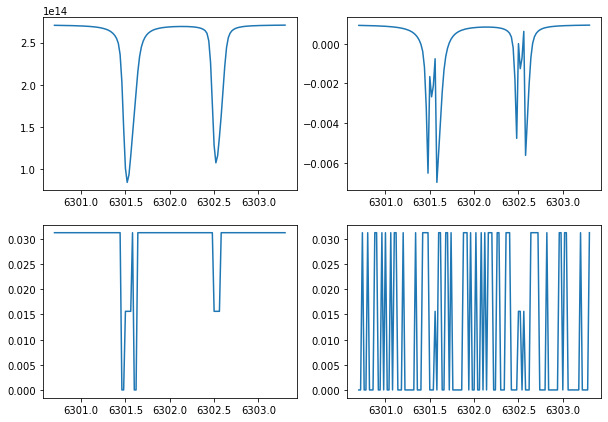

In [94]:
#Modulación
I_original = stokes2[x_coordinate,y_coordinate]
nl = len(ll)
S_measured = np.zeros([4,nl]) 
for l in range(0,nl):
    S_measured[:,l] = np.dot(O4,I_original[:,l])
#Desmodulación
I_inferred = np.zeros([4,nl])
O4_inv = np.linalg.inv(O4)
for l in range(0,nl):
    I_inferred[:,l] = np.dot(O4_inv,S_measured[:,l])   
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,I_inferred[0])
plt.subplot(222)
plt.plot(ll,I_inferred[1])
plt.subplot(223)
plt.plot(ll,I_inferred[2])
plt.subplot(224)
plt.plot(ll,I_inferred[3])


In [95]:
#Modulación y desmodulación con 6 medidas.
O6 = modulation_row(0,0)
O6 = np.concatenate([O6,modulation_row(pi/2,0)],axis=0)
O6 = np.concatenate([O6,modulation_row(pi/4,0)],axis=0)
O6 = np.concatenate([O6,modulation_row(3*pi/4,0)],axis=0)
O6 = np.concatenate([O6,modulation_row(pi/4,pi/2)],axis=0)
O6 = np.concatenate([O6,modulation_row(3*pi/4,pi/2)],axis=0)
print (O6)

[[ 1.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00  1.2246468e-16  0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  1.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00 -1.8369702e-16 -1.0000000e+00 -0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  6.1232340e-17  1.0000000e+00]
 [ 1.0000000e+00 -1.8369702e-16 -6.1232340e-17 -1.0000000e+00]]


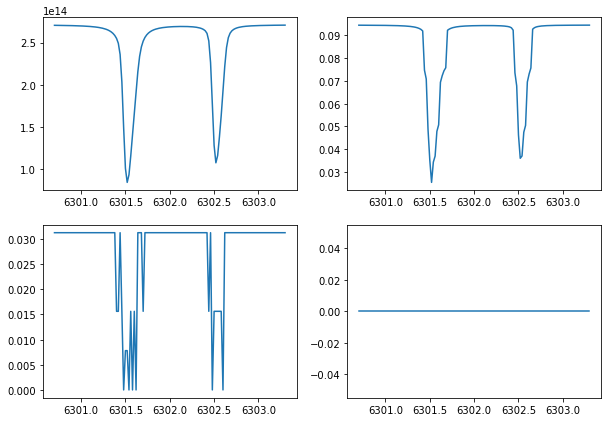

In [96]:
I_original = stokes2[x_coordinate,y_coordinate]
S_measured6 = np.zeros([6,nl]) 
for l in range(0,nl):
    S_measured6[:,l] = np.dot(O6,I_original[:,l])
I_inferred6 = np.zeros([4,nl])
O6_inv = np.linalg.pinv(O6)
for l in range(0,nl):
    I_inferred6[:,l] = np.dot(O6_inv,S_measured6[:,l])   
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,I_inferred6[0])
plt.subplot(222)
plt.plot(ll,I_inferred6[1])
plt.subplot(223)
plt.plot(ll,I_inferred6[2])
plt.subplot(224)
plt.plot(ll,I_inferred6[3])   